## Load Dataset

In [2]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
df=pd.read_csv(r'C:\Users\SPECTRE\Desktop\8th SEMESTER\AML\Assignments\A1\Restaurant_review.csv')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
2215,The staff was untrained and unfamiliar with th...,0
2216,The portions were skimpy and left us hungry.,0
2217,The restaurant had unclean restrooms and unple...,0
2218,The waiters were slow and forgetful with our o...,0


In [4]:
df.shape

(2220, 2)

## 1. Data Preprocessing 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2220 non-null   object
 1   Liked   2220 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.8+ KB


In [6]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
#Renaming columns
df.rename(columns={'Review':'Text Review','Liked':'Sentiment Labels'},inplace=True)

In [8]:
df.head(10)

,Text Review,Sentiment Labels
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.,0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['Sentiment Labels']=encoder.fit_transform(df['Sentiment Labels'])

In [11]:
df.head(10)

,Text Review,Sentiment Labels
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.,0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [12]:
#1-positive 2-negative

In [13]:
#missing values
df.isnull().sum()

Text Review         0
Sentiment Labels    0
dtype: int64

In [14]:
#check for duplicates
df.duplicated().sum()

612

In [15]:
#remove duplicates
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(1608, 2)

## EDA

In [18]:
import matplotlib.pyplot as plt

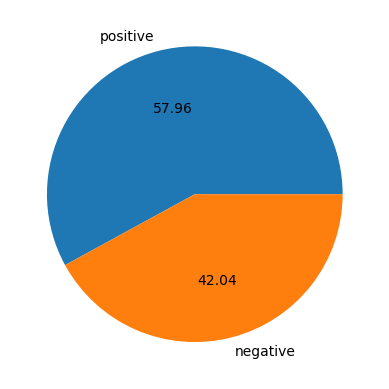

In [19]:
plt.pie(df['Sentiment Labels'].value_counts(),labels=['positive','negative'],autopct="%0.2f")
plt.show()

## Transformation


In [20]:
ps=PorterStemmer()
def transform_text(text):
    #Lower Case
    text=text.lower()
    #Tokenization
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    #Stopwords Removal
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    #Stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [21]:
df['Transformed Text Reviews']=df['Text Review'].apply(transform_text)

In [22]:
df.head()

,Text Review,Sentiment Labels,Transformed Text Reviews
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price


## 2. Feature Engineering

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#TFIDF
tfidf=TfidfVectorizer(max_features=3000)

In [24]:
X=tfidf.fit_transform(df['Transformed Text Reviews']).toarray()

In [25]:
X.shape

(1608, 1746)

In [26]:
#Count Vectorizer
count_vectorizer=CountVectorizer(max_features=3000)

In [27]:
Z=count_vectorizer.fit_transform(df['Transformed Text Reviews']).toarray()

In [28]:
Z.shape

(1608, 1746)

In [29]:
y=df['Sentiment Labels'].values

In [30]:
y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## 3. Model Selection

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
lrc=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()


In [33]:
clfs={
    'LR':lrc,
    'SVM':svc,
    'DT':dtc,
    'KNN':knc
}

## 4. Model Training

## TFIDF Training using CV and train test split

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [36]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    report=classification_report(y_test, y_pred)
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    return report

In [37]:
metrics_report=[]
for name, clf in clfs.items():
    current_report=train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ",name)
    print("Classification Report - ")
    print(current_report)
    
    metrics_report.append(current_report)

Confusion matrix:
[[168  14]
 [ 46  94]]
For  LR
Classification Report - 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       182
           1       0.87      0.67      0.76       140

    accuracy                           0.81       322
   macro avg       0.83      0.80      0.80       322
weighted avg       0.82      0.81      0.81       322

Confusion matrix:
[[166  16]
 [ 28 112]]
For  SVM
Classification Report - 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       182
           1       0.88      0.80      0.84       140

    accuracy                           0.86       322
   macro avg       0.87      0.86      0.86       322
weighted avg       0.86      0.86      0.86       322

Confusion matrix:
[[175   7]
 [109  31]]
For  DT
Classification Report - 
              precision    recall  f1-score   support

           0       0.62      0.96      0.75       182
           1  

In [38]:
# Cross-validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
def train_classifier_cv(clf, X,y):
    y_pred=cross_val_predict(clf, X, y, cv=5)
    print('Confusion matrix:')
    print(confusion_matrix(y, y_pred))
    
    
    return y_pred

In [39]:
metrics_report=[]
for name, clf in clfs.items():
    y_pred=train_classifier_cv(clf, X, y)
    
    report=classification_report(y,y_pred)
    print("For ",name)
    print("Classification Report - ")
    print(report)

Confusion matrix:
[[864  68]
 [303 373]]
For  LR
Classification Report - 
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       932
           1       0.85      0.55      0.67       676

    accuracy                           0.77      1608
   macro avg       0.79      0.74      0.75      1608
weighted avg       0.78      0.77      0.76      1608

Confusion matrix:
[[834  98]
 [180 496]]
For  SVM
Classification Report - 
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       932
           1       0.84      0.73      0.78       676

    accuracy                           0.83      1608
   macro avg       0.83      0.81      0.82      1608
weighted avg       0.83      0.83      0.83      1608

Confusion matrix:
[[905  27]
 [530 146]]
For  DT
Classification Report - 
              precision    recall  f1-score   support

           0       0.63      0.97      0.76       932
           1  

## After Balancing TFIDF (train-test and CV)

In [46]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_res, y_res=sm.fit_resample(X_train, y_train)


In [47]:
import numpy as np
unique_values, counts=np.unique(y_res, return_counts=True)
for value, count in zip(unique_values,counts):
    print("Value:", value, "- Count:",count)

Value: 0 - Count: 750
Value: 1 - Count: 750


In [48]:
def train_classifier(clf, X_res, y_res):
    clf.fit(X_res, y_res)
    y_pred=clf.predict(X_res)
    report=classification_report(y_res, y_pred)
    print('Confusion matrix:')
    print(confusion_matrix(y_res, y_pred))
    
    return report

In [49]:
metrics_report=[]
for name, clf in clfs.items():
    current_report=train_classifier(clf, X_res, y_res)
    
    print("For ",name)
    print("Classification Report - ")
    print(current_report)
    
    metrics_report.append(current_report)

Confusion matrix:
[[648 102]
 [ 31 719]]
For  LR
Classification Report - 
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       750
           1       0.88      0.96      0.92       750

    accuracy                           0.91      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.92      0.91      0.91      1500

Confusion matrix:
[[511 239]
 [220 530]]
For  SVM
Classification Report - 
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       750
           1       0.69      0.71      0.70       750

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.69      0.69      0.69      1500

Confusion matrix:
[[120 630]
 [  0 750]]
For  DT
Classification Report - 
              precision    recall  f1-score   support

           0       1.00      0.16      0.28       750
           1  

In [50]:
# Cross-validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
def train_classifier_cv(clf, X_res,y_res):
    y_pred=cross_val_predict(clf, X_res, y_res, cv=5)
    print('Confusion matrix:')
    print(confusion_matrix(y_res, y_pred))
    
    return y_pred

In [51]:
for name, clf in clfs.items():
    y_pred=train_classifier_cv(clf, X_res, y_res)
    
    report=classification_report(y_res,y_pred)
    print("For ",name)
    print("Classification Report - ")
    print(report)

Confusion matrix:
[[561 189]
 [123 627]]
For  LR
Classification Report - 
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       750
           1       0.77      0.84      0.80       750

    accuracy                           0.79      1500
   macro avg       0.79      0.79      0.79      1500
weighted avg       0.79      0.79      0.79      1500

Confusion matrix:
[[539 211]
 [251 499]]
For  SVM
Classification Report - 
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       750
           1       0.70      0.67      0.68       750

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.69      0.69      0.69      1500

Confusion matrix:
[[483 267]
 [362 388]]
For  DT
Classification Report - 
              precision    recall  f1-score   support

           0       0.57      0.64      0.61       750
           1  

## Count Vectorizer Training using CV and train test split

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [41]:
X_train, X_test, y_train,y_test=train_test_split(Z,y,test_size=0.2, random_state=2)

In [42]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    report=classification_report(y_test, y_pred)
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    return report

In [43]:
metrics_report=[]
for name, clf in clfs.items():
    current_report=train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ",name)
    print("Classification Report - ")
    print(current_report)
    metrics_report.append(current_report)

Confusion matrix:
[[166  16]
 [ 32 108]]
For  LR
Classification Report - 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       182
           1       0.87      0.77      0.82       140

    accuracy                           0.85       322
   macro avg       0.85      0.84      0.85       322
weighted avg       0.85      0.85      0.85       322

Confusion matrix:
[[137  45]
 [ 50  90]]
For  SVM
Classification Report - 
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       182
           1       0.67      0.64      0.65       140

    accuracy                           0.70       322
   macro avg       0.70      0.70      0.70       322
weighted avg       0.70      0.70      0.70       322

Confusion matrix:
[[175   7]
 [101  39]]
For  DT
Classification Report - 
              precision    recall  f1-score   support

           0       0.63      0.96      0.76       182
           1  

In [44]:
# Cross-validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
def train_classifier_cv(clf, Z,y):
    y_pred=cross_val_predict(clf, Z, y, cv=5)
    print('Confusion matrix:')
    print(confusion_matrix(y, y_pred))
    
    
    return y_pred

In [45]:
for name, clf in clfs.items():
    y_pred=train_classifier_cv(clf, Z, y)
    
    report=classification_report(y,y_pred)
    print("For ",name)
    print("Classification Report - ")
    print(report)

Confusion matrix:
[[846  86]
 [218 458]]
For  LR
Classification Report - 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       932
           1       0.84      0.68      0.75       676

    accuracy                           0.81      1608
   macro avg       0.82      0.79      0.80      1608
weighted avg       0.81      0.81      0.81      1608

Confusion matrix:
[[740 192]
 [249 427]]
For  SVM
Classification Report - 
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       932
           1       0.69      0.63      0.66       676

    accuracy                           0.73      1608
   macro avg       0.72      0.71      0.71      1608
weighted avg       0.72      0.73      0.72      1608

Confusion matrix:
[[902  30]
 [522 154]]
For  DT
Classification Report - 
              precision    recall  f1-score   support

           0       0.63      0.97      0.77       932
           1  

## After Balancing Count Vectorizer (train-test and CV)

In [52]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
Z_res, y_res=sm.fit_resample(X_train, y_train)


In [53]:
import numpy as np
unique_values, counts=np.unique(y_res, return_counts=True)
for value, count in zip(unique_values,counts):
    print("Value:", value, "- Count:",count)

Value: 0 - Count: 750
Value: 1 - Count: 750


In [54]:
def train_classifier(clf, Z_res, y_res):
    clf.fit(Z_res, y_res)
    y_pred=clf.predict(Z_res)
    report=classification_report(y_res, y_pred)
    print('Confusion matrix:')
    print(confusion_matrix(y_res, y_pred))
    
    return report

In [55]:
metrics_report=[]
for name, clf in clfs.items():
    current_report=train_classifier(clf, Z_res, y_res)
    
    print("For ",name)
    print("Classification Report - ")
    print(current_report)
    metrics_report.append(current_report)

Confusion matrix:
[[648 102]
 [ 31 719]]
For  LR
Classification Report - 
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       750
           1       0.88      0.96      0.92       750

    accuracy                           0.91      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.92      0.91      0.91      1500

Confusion matrix:
[[500 250]
 [200 550]]
For  SVM
Classification Report - 
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       750
           1       0.69      0.73      0.71       750

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.70      0.70      0.70      1500

Confusion matrix:
[[120 630]
 [  0 750]]
For  DT
Classification Report - 
              precision    recall  f1-score   support

           0       1.00      0.16      0.28       750
           1  

In [56]:
# Cross-validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
def train_classifier_cv(clf, Z_res,y_res):
    y_pred=cross_val_predict(clf, Z_res, y_res, cv=5)
    print('Confusion matrix:')
    print(confusion_matrix(y_res, y_pred))
    
    return y_pred

In [57]:
for name, clf in clfs.items():
    y_pred=train_classifier_cv(clf, Z_res, y_res)
    
    report=classification_report(y_res,y_pred)
    print("For ",name)
    print("Classification Report - ")
    print(report)

Confusion matrix:
[[560 190]
 [147 603]]
For  LR
Classification Report - 
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       750
           1       0.76      0.80      0.78       750

    accuracy                           0.78      1500
   macro avg       0.78      0.78      0.78      1500
weighted avg       0.78      0.78      0.78      1500

Confusion matrix:
[[517 233]
 [260 490]]
For  SVM
Classification Report - 
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       750
           1       0.68      0.65      0.67       750

    accuracy                           0.67      1500
   macro avg       0.67      0.67      0.67      1500
weighted avg       0.67      0.67      0.67      1500

Confusion matrix:
[[488 262]
 [369 381]]
For  DT
Classification Report - 
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       750
           1  

## 5. Fine Tuning

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score

svm_classifier=SVC()

param_dist={
    'C':[0.1, 1, 10, 100],
    'kernel':['linear', 'poly', 'rbf'],
    'gamma':['scale','auto'],
    'degree':[2,3,4],
}

random_search=RandomizedSearchCV(estimator=svm_classifier,
                                param_distributions=param_dist,
                                n_iter=10,
                                cv=5,
                                verbose=1,
                                random_state=42,
                                n_jobs=-1,
                                scoring='accuracy')

random_search.fit(X_train,y_train)

print(random_search.best_params_)

model=random_search.best_estimator_
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test, y_pred)
print('Accuracy:',accuracy)
print('Precision',precision)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 10}
Accuracy: 0.8478260869565217
Precision 0.8699186991869918
